In [1]:
import pickle
import numpy as np
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Handle missing values
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)


C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\429657371.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\429657371.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# Drop Loan_ID (not useful)
if "Loan_ID" in df.columns:
    df.drop(columns=["Loan_ID"], inplace=True)


In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  147.350163        341.628664   
std        6109.041673        2926.248369   87.444391         65.656819   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.000000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  167.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.835505  
std          0.371027  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


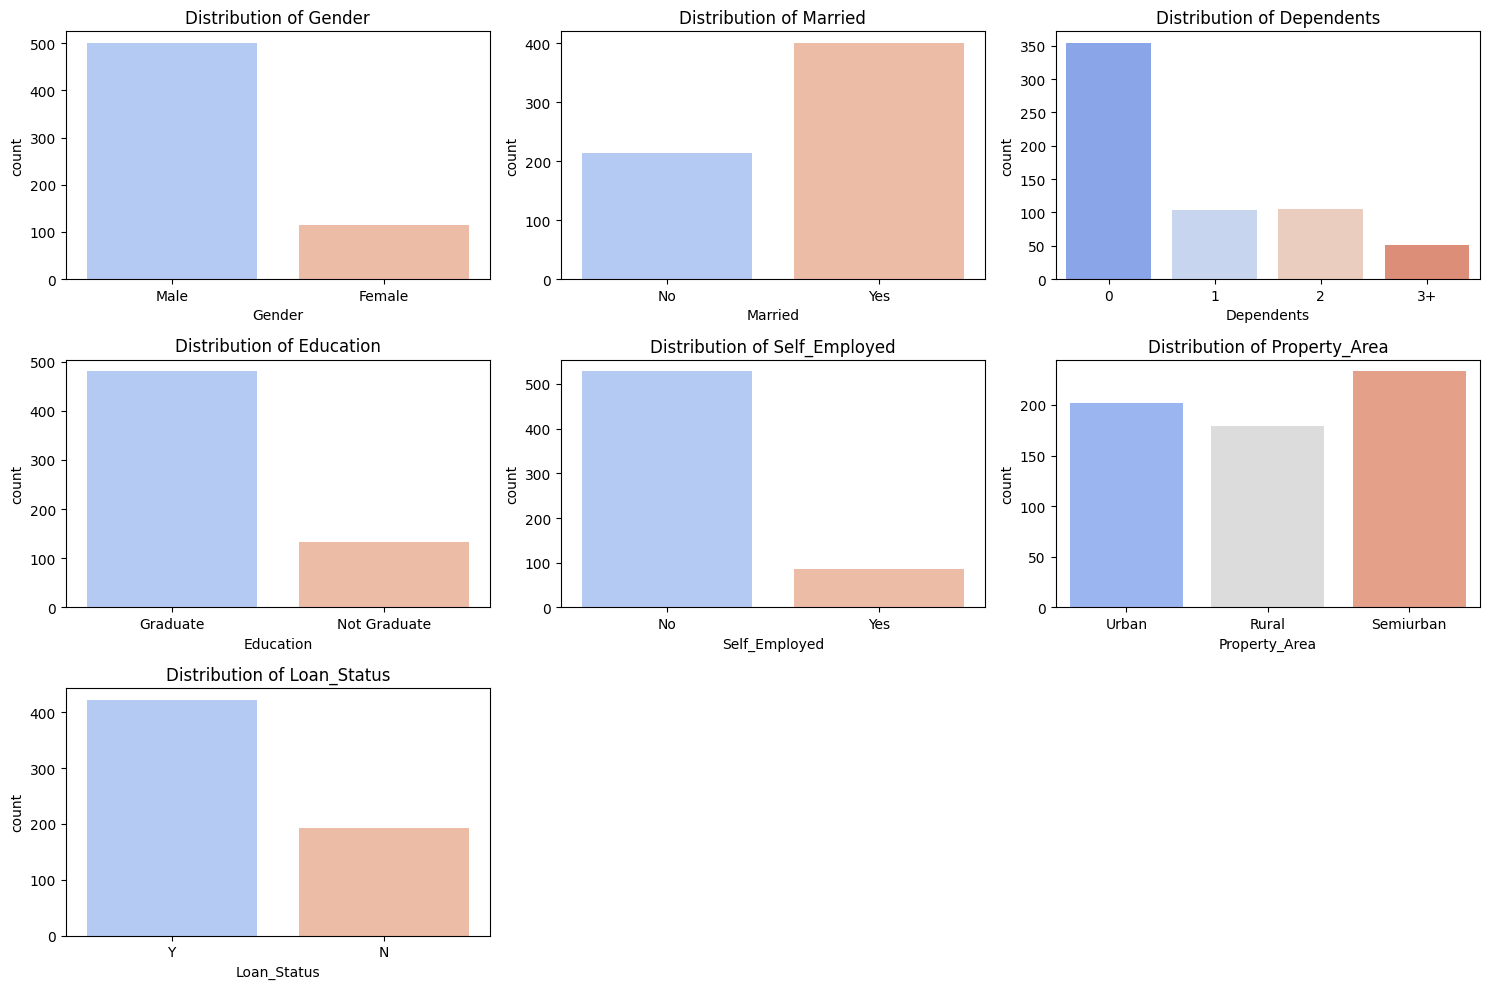

In [10]:
%matplotlib inline
# Countplot for categorical variables
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df[col], palette="coolwarm", legend=False)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\3957225462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Credit_History"], y=pd.get_dummies(df["Loan_Status"], drop_first=True)["Y"], palette="viridis")


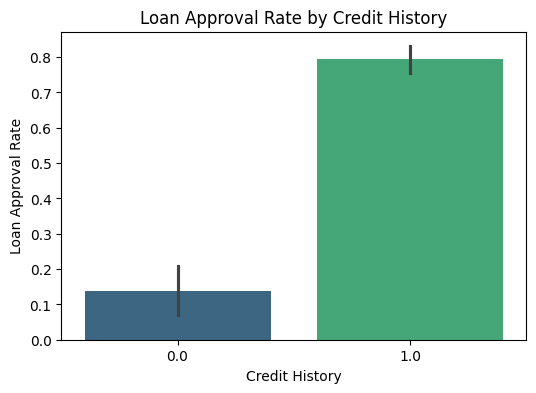

In [11]:
# Loan Status vs Credit History
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Credit_History"], y=pd.get_dummies(df["Loan_Status"], drop_first=True)["Y"], palette="viridis")
plt.xlabel("Credit History")
plt.ylabel("Loan Approval Rate")
plt.title("Loan Approval Rate by Credit History")
plt.show()

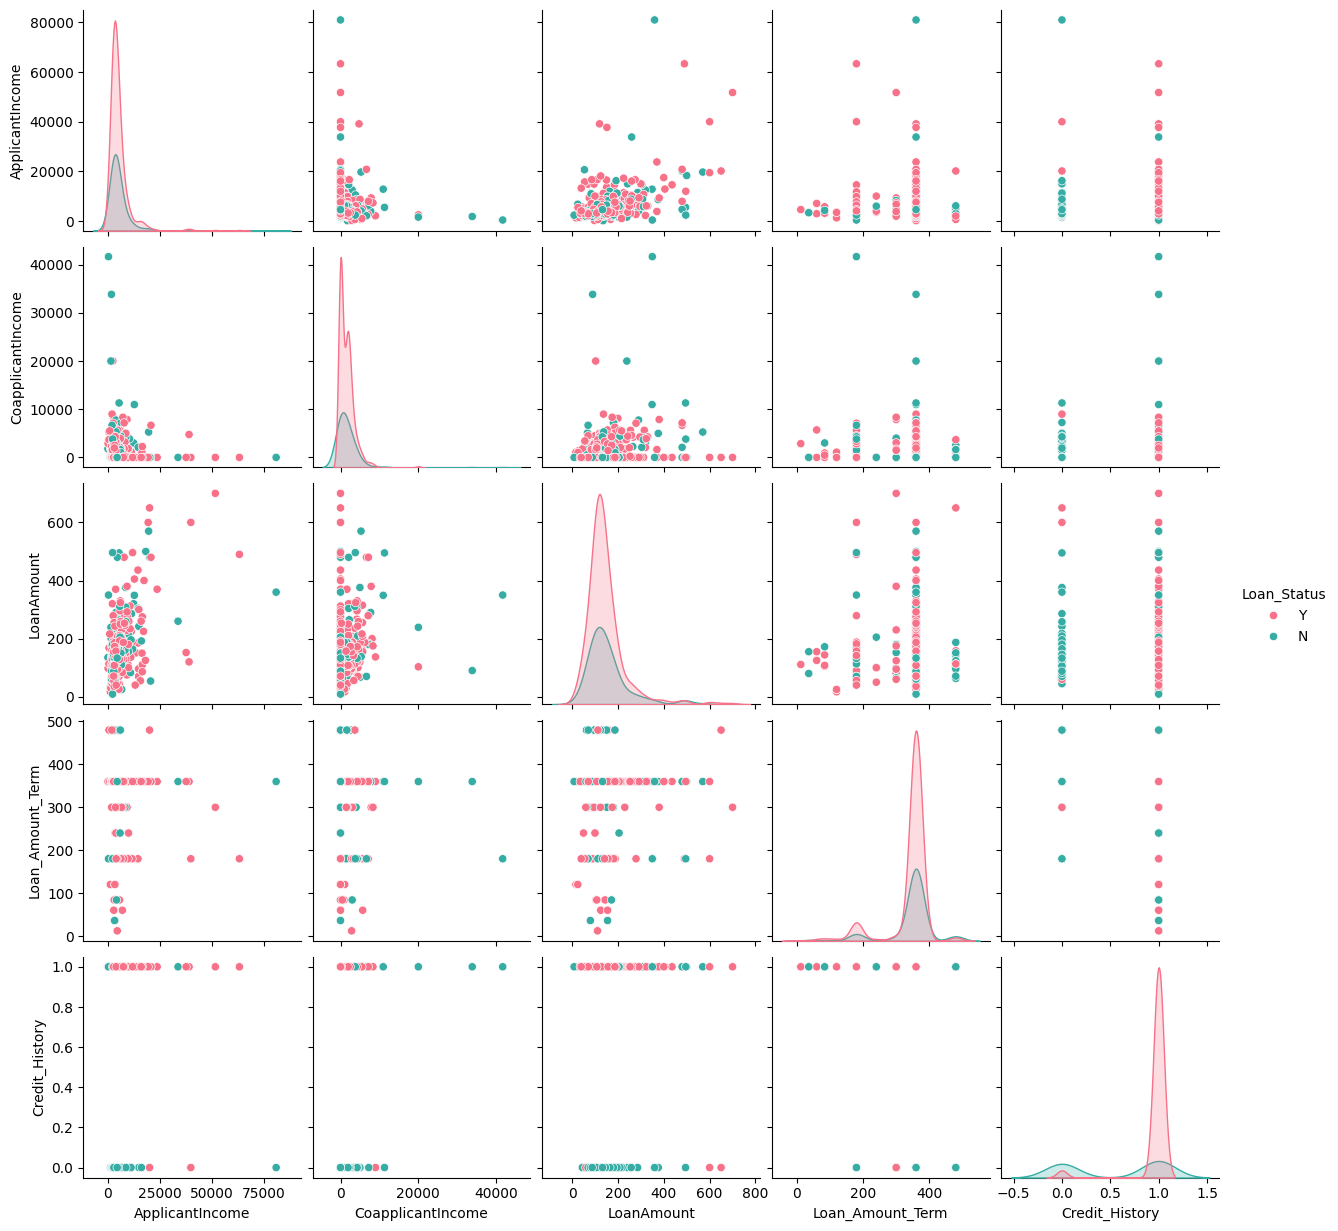

In [12]:
# Pairplot to see relationships between numerical variables
sns.pairplot(df, hue="Loan_Status", palette="husl")
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\2856079922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\2856079922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\2856079922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm")
C:\Users\sneha\AppData\Local\Temp\ipykernel_8776\2856079922.py:6: FutureWarning: 

Passing `palette` without assigning

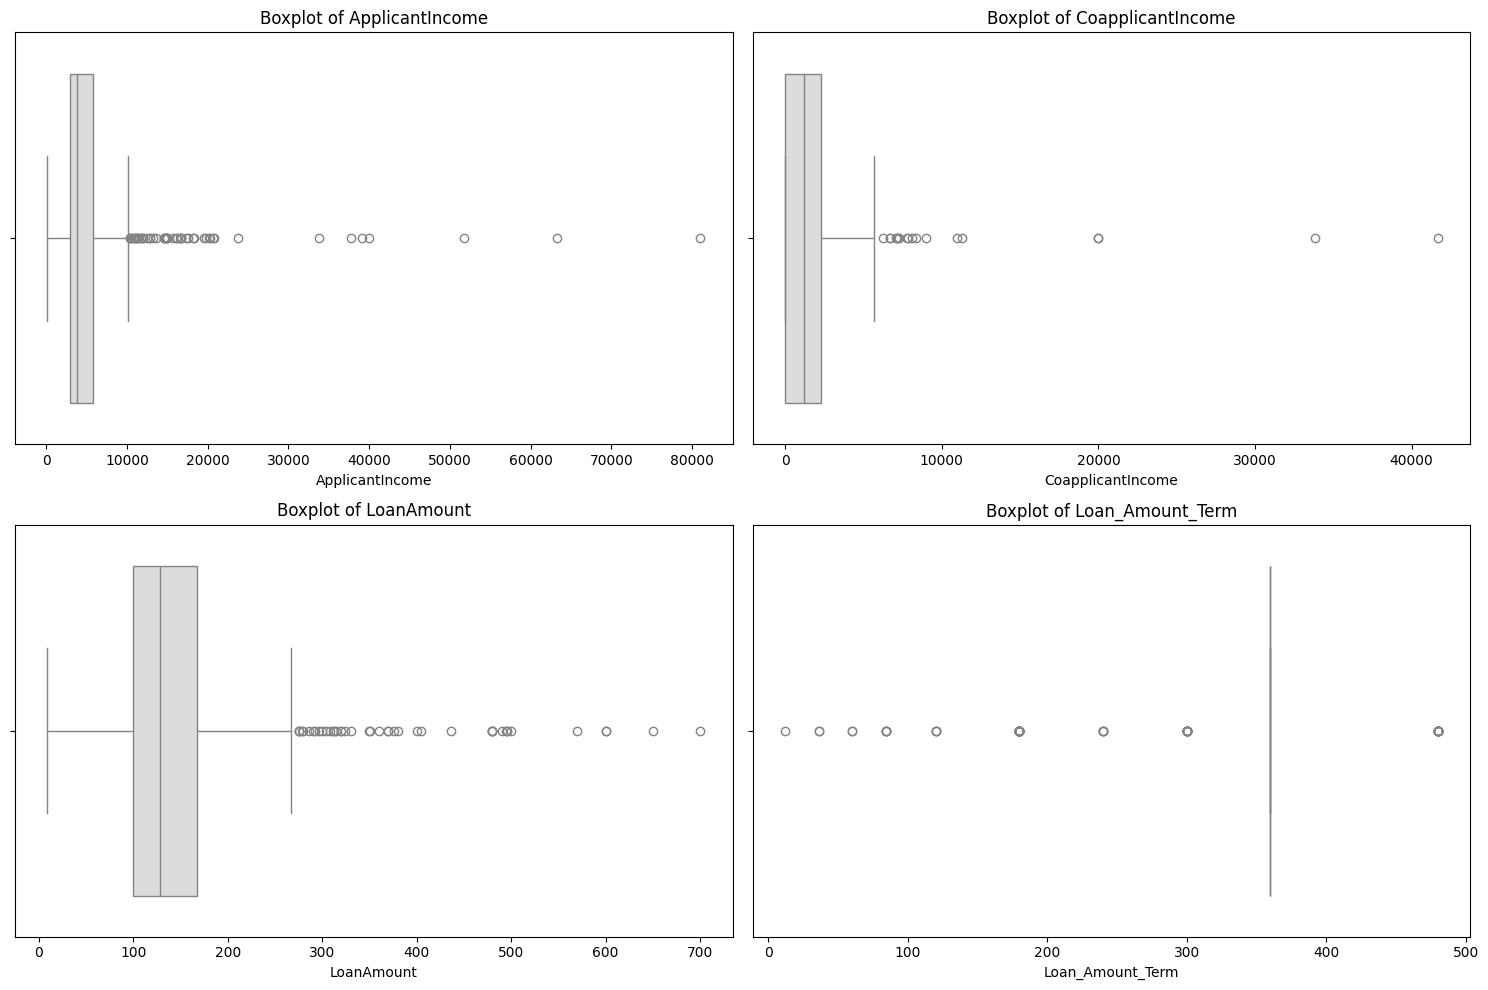

In [13]:
# Boxplot to check outliers in numerical features
numeric_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], palette="coolwarm")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [14]:
# Encode categorical variables
df1 = pd.get_dummies(df, columns=["Gender", "Married", "Dependents", "Education", 
                                  "Self_Employed", "Property_Area", "Loan_Status"], drop_first=True)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,False,False,True,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,False,False,True,True


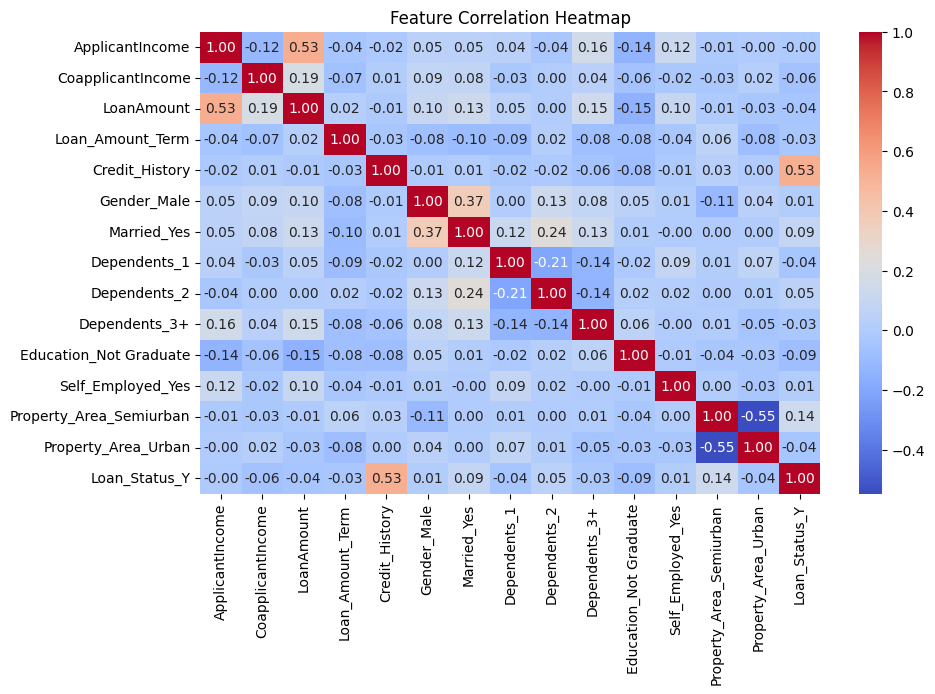

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Define features and target variable
X = df1.drop(columns=["Loan_Status_Y"])
y = df1["Loan_Status_Y"]

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [18]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [19]:
y_pred = model.predict(X_test)


In [20]:

# Assuming y_test contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy Score: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy Score: 0.8117
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.56      0.62        43
        True       0.84      0.91      0.87       111

    accuracy                           0.81       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154



In [21]:
# Save model
pickle.dump(model, open("loan_model.pkl", "wb"))


In [22]:
# Load trained model
model = pickle.load(open("loan_model.pkl", "rb"))


In [23]:
# ========================
# 🎨 **Streamlit UI**
# ========================
st.title("🏦 Loan Approval Prediction App")

st.sidebar.subheader("📊 Exploratory Data Analysis")


2025-03-10 15:54:58.538 
  command:

    streamlit run C:\Users\sneha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [24]:
# Plot numerical distributions
numeric_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for col in numeric_cols:
    st.sidebar.write(f"### {col} Distribution")
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    st.sidebar.pyplot(fig)

In [25]:
# Loan Approval vs Credit History
st.sidebar.write("### Loan Approval vs. Credit History")
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=df1["Credit_History"], y=df1["Loan_Status_Y"], ax=ax)
st.sidebar.pyplot(fig)


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [26]:
# Correlation Heatmap
st.sidebar.write("### Correlation Heatmap")
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
st.sidebar.pyplot(fig)


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [27]:
# ========================
# 🏦 **User Input Section**
# ========================
st.markdown("""
### 📌 Instructions:
- Enter your details below.
- Click **Predict Loan Approval**.
- See if your loan is **Approved ✅** or **Rejected ❌**.
""")


DeltaGenerator()

In [28]:
# Input fields
gender = st.radio("👤 Gender", ["Male", "Female"])
married = st.radio("💍 Marital Status", ["Single", "Married"])
dependents = st.radio("👶 Number of Dependents", ["0", "1", "2", "3+"])
education = st.radio("🎓 Education Level", ["Graduate", "Not Graduate"])
self_employed = st.radio("💼 Self-Employed?", ["No", "Yes"])
applicant_income = st.number_input("💰 Applicant Income (₹)", min_value=0, format="%d")
coapplicant_income = st.number_input("👨‍👩‍👦 Coapplicant Income (₹)", min_value=0, format="%d")
loan_amount = st.number_input("🏦 Loan Amount (₹)", min_value=0, format="%d")
loan_term = st.selectbox("📆 Loan Term (Months)", [12, 36, 60, 120, 180, 240, 300, 360, 480])
credit_history = st.radio("📊 Credit History", ["Bad Credit (0)", "Good Credit (1)"])
property_area = st.radio("📍 Property Location", ["Rural", "Semiurban", "Urban"])


2025-03-10 15:55:00.104 Session state does not function when running a script without `streamlit run`


In [29]:
# Convert inputs to match model features
input_data = {
    "Gender_Male": 1 if gender == "Male" else 0,
    "Married_Yes": 1 if married == "Married" else 0,
    "Dependents_0": 1 if dependents == "0" else 0,
    "Dependents_1": 1 if dependents == "1" else 0,
    "Dependents_2": 1 if dependents == "2" else 0,
    "Dependents_3+": 1 if dependents == "3+" else 0,
    "Education_Not Graduate": 1 if education == "Not Graduate" else 0,
    "Self_Employed_Yes": 1 if self_employed == "Yes" else 0,
    "ApplicantIncome": applicant_income,
    "CoapplicantIncome": coapplicant_income,
    "LoanAmount": loan_amount,
    "Loan_Amount_Term": loan_term,
    "Credit_History": 1 if credit_history == "Good Credit (1)" else 0,
    "Property_Area_Semiurban": 1 if property_area == "Semiurban" else 0,
    "Property_Area_Urban": 1 if property_area == "Urban" else 0,
}

In [30]:
# Ensure input order matches training features
input_df = pd.DataFrame([input_data])
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)


In [31]:
# Prediction button
if st.button("🚀 Predict Loan Approval"):
    prediction = model.predict(input_df)
    result = "✅ Loan Approved!" if prediction[0] == 1 else "❌ Loan Rejected!"
    st.markdown(f"## **{result}**")


# ---------------------------------------------------------------------------------------